# Lab 4 Sample Code

In [6]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(x):
    """Sigmoid function.
    This function accepts any shape of np.ndarray object as input and perform sigmoid operation.
    """
    return 1 / (1 + np.exp(-x))


def der_sigmoid(y):
    """First derivative of Sigmoid function.
    The input to this function should be the value that output from sigmoid function.
    """
    return y * (1 - y)


class GenData:
    @staticmethod
    def _gen_linear(n=100):
        """Data generation (Linear)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        pos = np.array([(np.random.random(), np.random.random()) for i in range(n)])
        x, y = pos[:, 0], pos[:, 1]
        return pos, (x > y).astype(np.int64).reshape((-1, 1))

    @staticmethod
    def _gen_xor(n=100):
        """Data generation (XOR)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        data_x = np.linspace(0, 1, n // 2)

        inputs = []
        labels = []

        for x in data_x:
            inputs.append([x, x])
            labels.append(0)

            if x == 1 - x:
                continue

            inputs.append([x, 1 - x])
            labels.append(1)

        return np.array(inputs), np.array(labels).reshape((-1, 1))

    @staticmethod
    def _gen_chessboard(n=100):
        """Data generation (Chessboard)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        pos = np.array([(np.random.random(), np.random.random()) for i in range(n)])
        x, y = pos[:, 0], pos[:, 1]
        return pos, ((x < 0.25) ^ (x > 0.5) ^ (x > 0.75) ^ (y < 0.25) ^ (y > 0.5) ^ (y > 0.75)).astype(np.int64).reshape(
            (-1, 1)
        )

    @staticmethod
    def fetch_data(mode, n):
        """Data gather interface

        Args:
            mode (str): 'Linear' or 'XOR', indicate which generator is used.
            n (int):    the number of data points generated in total.
        """
        assert mode == "Linear" or mode == "XOR" or mode == "Chessboard"

        data_gen_func = {"Linear": GenData._gen_linear, "XOR": GenData._gen_xor, "Chessboard": GenData._gen_chessboard}[mode]

        return data_gen_func(n)


class SimpleNet:
    def __init__(self, num_step=6000, print_interval=100, learning_rate=1e-2):  # don't change print_interval
        """A hand-crafted implementation of simple network.

        Args:
            num_step (optional):    the total number of training steps.
            print_interval (optional):  the number of steps between each reported number.
        """
        self.num_step = num_step
        self.print_interval = print_interval
        self.learning_rate = learning_rate
     
        # Model parameters initialization
        self.hidden1_weights = np.random.randn(100, 2) 
        self.hidden2_weights = np.random.randn(50, 100) 
        self.hidden3_weights = np.random.randn(10, 50) 
        self.output_weights = np.random.randn(1, 10) 

        self.hidden1_bias = np.zeros((100, 1))
        self.hidden2_bias = np.zeros((50, 1))
        self.hidden3_bias = np.zeros((10, 1))
        self.output_bias = np.zeros((1, 1))

    @staticmethod
    def plot_result(data, gt_y, pred_y):
        """Data visualization with ground truth and predicted data comparison. There are two plots
        for them and each of them use different colors to differentiate the data with different labels.

        Args:
            data:   the input data
            gt_y:   ground truth to the data
            pred_y: predicted results to the data
        """
        assert data.shape[0] == gt_y.shape[0] == pred_y.shape[0], f"{data.shape}, {gt_y.shape}, {pred_y.shape}"

        plt.figure(figsize=(11, 5))

        plt.subplot(121)
        plt.title("Ground Truth", fontsize=18)
        plt.scatter(data[:,0], data[:,1], c=gt_y[:,0], cmap=plt.cm.bwr)

        plt.subplot(122)
        plt.title("Prediction", fontsize=18)
        plt.scatter(data[:,0], data[:,1], c=pred_y[:,0], cmap=plt.cm.bwr)

        plt.show()

    def forward(self, inputs):
        """Implementation of the forward pass.
        It should accepts the inputs and passing them through the network and return results.
        """
        """ FILL IN HERE """
        # 將 inputs 轉置為 (2, 1)
        inputs = inputs.T  # 確保輸入形狀正確
        # 第一層隱藏層
        self.z1 = np.dot(self.hidden1_weights, inputs) + self.hidden1_bias
        self.a1 = sigmoid(self.z1)

        # 第二層隱藏層
        self.z2 = np.dot(self.hidden2_weights, self.a1) + self.hidden2_bias
        self.a2 = sigmoid(self.z2)

        # 第三層隱藏層
        self.z3 = np.dot(self.hidden3_weights, self.a2) + self.hidden3_bias
        self.a3 = sigmoid(self.z3)

        # 輸出層
        self.z_out = np.dot(self.output_weights, self.a3) + self.output_bias
        self.a_out = sigmoid(self.z_out)

        return self.a_out.T#

    def backward(self, inputs, labels):
        """Implementation of the backward pass.
        It should utilize the saved loss to compute gradients and update the network all the way to the front.
        """
        """ FILL IN HERE """
        m = inputs.shape[0]  # batch size

        # compute loss
        dz_out = (self.a_out - labels)  # prediction error
        dW_out = np.dot(dz_out, self.a3.T) / m
        db_out = np.sum(dz_out, axis=1, keepdims=True) / m
        # Backpropagate to hidden layer 3
        dz3 = np.dot(self.output_weights.T, dz_out) * der_sigmoid(self.a3)
        dW3 = np.dot(dz3, self.a2.T) / m
        db3 = np.sum(dz3, axis=1, keepdims=True) / m
        # Backpropagate to hidden layer 2
        dz2 = np.dot(self.hidden3_weights.T, dz3) * der_sigmoid(self.a2)
        dW2 = np.dot(dz2, self.a1.T) / m
        db2 = np.sum(dz2, axis=1, keepdims=True) / m
        # Backpropagate to hidden layer 1
        dz1 = np.dot(self.hidden2_weights.T, dz2) * der_sigmoid(self.a1)
        dW1 = np.dot(dz1, inputs) / m
        db1 = np.sum(dz1, axis=1, keepdims=True) / m

        # update weights and bias
        self.output_weights -= self.learning_rate * dW_out
        self.output_bias -= self.learning_rate * db_out

        self.hidden3_weights -= self.learning_rate * dW3
        self.hidden3_bias -= self.learning_rate * db3

        self.hidden2_weights -= self.learning_rate * dW2
        self.hidden2_bias -= self.learning_rate * db2

        self.hidden1_weights -= self.learning_rate * dW1
        self.hidden1_bias -= self.learning_rate * db1

    def train(self, inputs, labels, val_data, val_labels, test_data, test_labels):
        """The training routine that runs and update the model.

        Args:
            inputs: the training (and testing) data used in the model.
            labels: the ground truth of correspond to input data.
        """
        # make sure that the amount of data and label is match
        assert inputs.shape[0] == labels.shape[0]

        n = inputs.shape[0]

        for epochs in range(self.num_step):
            for idx in range(n):
               
                input_sample = inputs[idx : idx + 1, :]
                label_sample = labels[idx : idx + 1, :]
                self.output = self.forward(input_sample)
                self.backward(input_sample, label_sample)

            if epochs % self.print_interval == 0:
                print("Epochs {}: Train ".format(epochs), end="")
                self.test(inputs, labels)
                val_accuracy = self.evaluate(val_data, val_labels)
                print(f"Validation accuracy: {val_accuracy:.2f}%")
                print('-------------------------------')

        print("Training finished")
        self.test(test_data, test_labels)

    def test(self, inputs, labels):
        """The testing routine that run forward pass and report the accuracy.

        Args:
            inputs: the testing data. One or several data samples are both okay.
                The shape is expected to be [BatchSize, 2].
            labels: the ground truth correspond to the inputs.
        """
        n = inputs.shape[0]

        error = 0.0
        for idx in range(n):
            result = self.forward(inputs[idx : idx + 1, :])
            error += abs(result - labels[idx : idx + 1, :])

        error /= n
        error = error.item()

        """ Print or plot your results in your preferred forms"""
        print("accuracy: %.2f" % ((1 - error) * 100) + "%")
    def evaluate(self, inputs, labels):
        n = inputs.shape[0]
        correct = 0
        for idx in range(n):
            result = np.round(self.forward(inputs[idx:idx + 1, :]))
            if result == labels[idx:idx + 1, :]:
                correct += 1
        return (correct / n) * 100

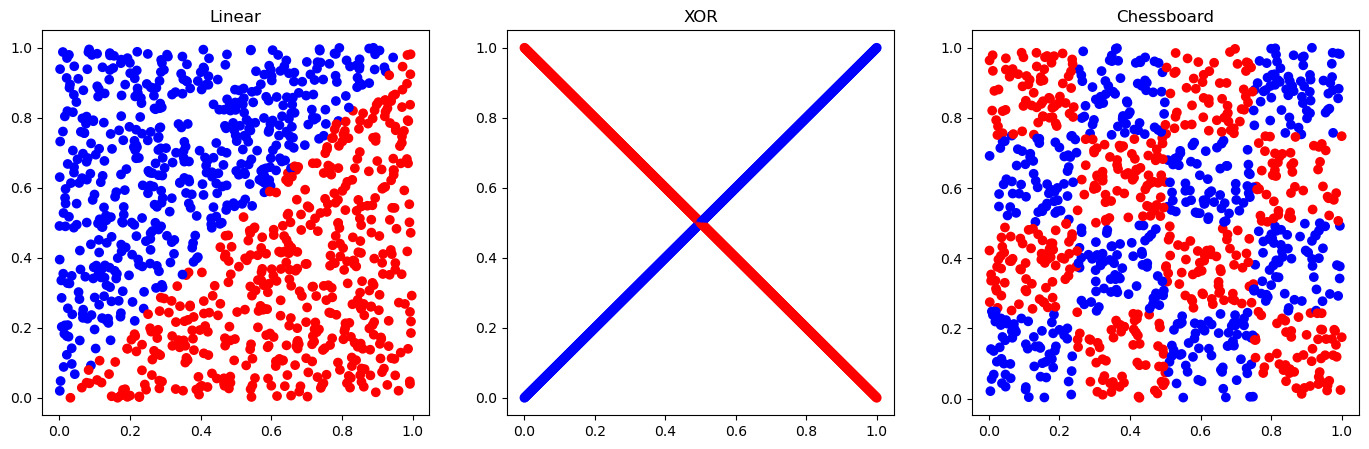

In [2]:
plt.figure(figsize=(17, 5))
for i, name in enumerate(['Linear', 'XOR', 'Chessboard']):
    data, label = GenData.fetch_data(name, 1000)
    plt.subplot(1,3,i+1)
    plt.scatter(data[:, 0], data[:, 1], c=label[:, 0], cmap=plt.cm.bwr)
    plt.title(name)

### Run "Linear"

Epochs 0: Train accuracy: 51.62%
Validation accuracy: 46.67%
-------------------------------
Epochs 100: Train accuracy: 87.27%
Validation accuracy: 100.00%
-------------------------------
Epochs 200: Train accuracy: 92.80%
Validation accuracy: 100.00%
-------------------------------
Epochs 300: Train accuracy: 94.79%
Validation accuracy: 100.00%
-------------------------------
Epochs 400: Train accuracy: 95.82%
Validation accuracy: 100.00%
-------------------------------
Epochs 500: Train accuracy: 96.46%
Validation accuracy: 100.00%
-------------------------------
Epochs 600: Train accuracy: 96.90%
Validation accuracy: 100.00%
-------------------------------
Epochs 700: Train accuracy: 97.22%
Validation accuracy: 100.00%
-------------------------------
Epochs 800: Train accuracy: 97.47%
Validation accuracy: 100.00%
-------------------------------
Epochs 900: Train accuracy: 97.67%
Validation accuracy: 100.00%
-------------------------------
Epochs 1000: Train accuracy: 97.84%
Validat

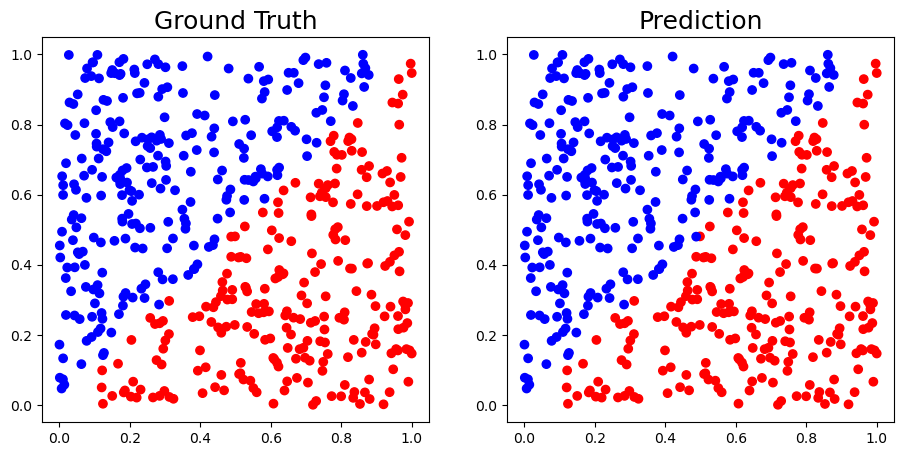

In [3]:
""" Customize your own code if needed """
from sklearn.model_selection import train_test_split

data, label = GenData.fetch_data("Linear", 500)
train_data, test_data, train_labels, test_labels = train_test_split(data, label, test_size=0.1, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

net = SimpleNet(2000)
net.train(train_data, train_labels, val_data, val_labels, test_data, test_labels)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)

### Run "XOR"

Epochs 0: Train accuracy: 51.01%
Validation accuracy: 45.56%
-------------------------------
Epochs 100: Train accuracy: 59.66%
Validation accuracy: 82.22%
-------------------------------
Epochs 200: Train accuracy: 73.96%
Validation accuracy: 86.67%
-------------------------------
Epochs 300: Train accuracy: 82.19%
Validation accuracy: 90.00%
-------------------------------
Epochs 400: Train accuracy: 86.21%
Validation accuracy: 93.33%
-------------------------------
Epochs 500: Train accuracy: 88.48%
Validation accuracy: 95.56%
-------------------------------
Epochs 600: Train accuracy: 89.95%
Validation accuracy: 95.56%
-------------------------------
Epochs 700: Train accuracy: 91.00%
Validation accuracy: 97.78%
-------------------------------
Epochs 800: Train accuracy: 91.79%
Validation accuracy: 97.78%
-------------------------------
Epochs 900: Train accuracy: 92.43%
Validation accuracy: 97.78%
-------------------------------
Epochs 1000: Train accuracy: 92.95%
Validation accur

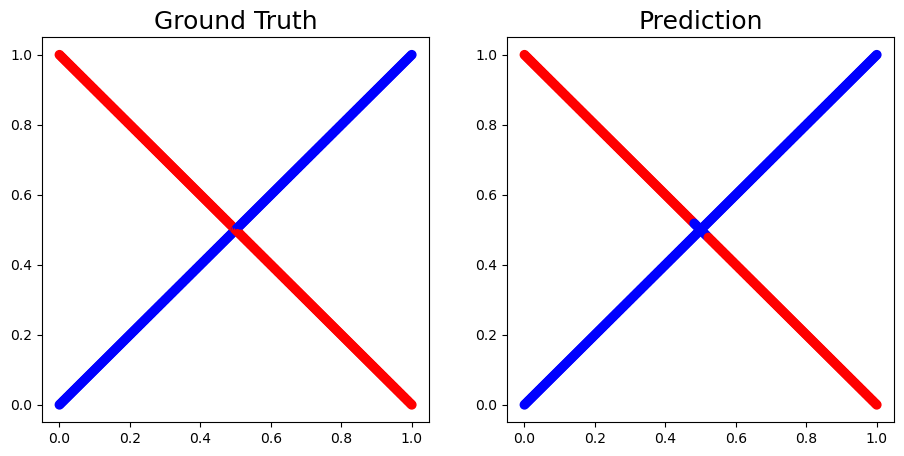

In [4]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("XOR", 500)
train_data, test_data, train_labels, test_labels = train_test_split(data, label, test_size=0.1, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

net = SimpleNet(2000)
net.train(train_data, train_labels, val_data, val_labels, test_data, test_labels)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)

### Run "Chessboard"

Epochs 0: Train accuracy: 50.24%
Validation accuracy: 50.00%
-------------------------------
Epochs 100: Train accuracy: 52.22%
Validation accuracy: 57.78%
-------------------------------
Epochs 200: Train accuracy: 54.86%
Validation accuracy: 60.56%
-------------------------------
Epochs 300: Train accuracy: 61.73%
Validation accuracy: 67.22%
-------------------------------
Epochs 400: Train accuracy: 71.30%
Validation accuracy: 82.78%
-------------------------------
Epochs 500: Train accuracy: 81.66%
Validation accuracy: 87.78%
-------------------------------
Epochs 600: Train accuracy: 88.22%
Validation accuracy: 90.00%
-------------------------------
Epochs 700: Train accuracy: 91.39%
Validation accuracy: 91.11%
-------------------------------
Epochs 800: Train accuracy: 92.44%
Validation accuracy: 91.11%
-------------------------------
Epochs 900: Train accuracy: 93.21%
Validation accuracy: 92.22%
-------------------------------
Epochs 1000: Train accuracy: 93.86%
Validation accur

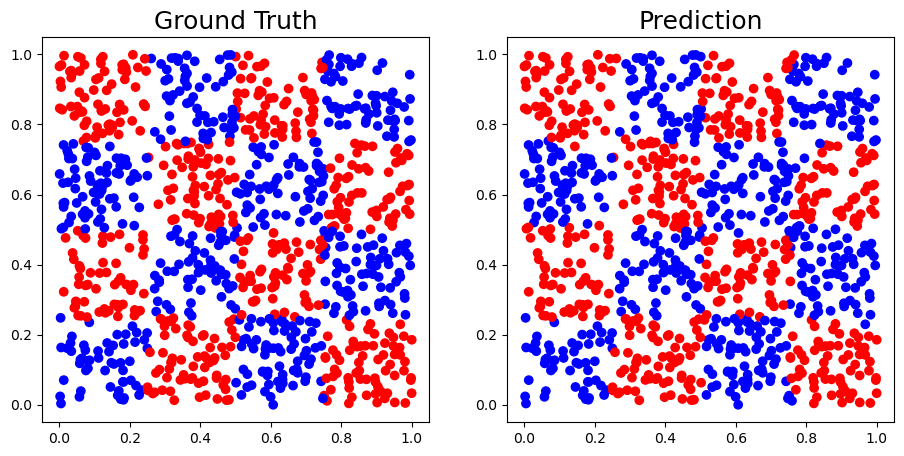

In [7]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("Chessboard", 1000)
train_data, test_data, train_labels, test_labels = train_test_split(data, label, test_size=0.1, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

net = SimpleNet(2000)
net.train(train_data, train_labels, val_data, val_labels, test_data, test_labels)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)